In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras import models
from keras.optimizers import Adam
from keras.losses import MeanSquaredLogarithmicError
from keras.optimizers import SGD
from keras.optimizers import Adagrad



##Procesando informacion

In [ ]:
!git clone https://github.com/santiago2800/mini_proyecto # se descarga el archico directamente desde github

Cloning into 'mini_proyecto'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 7.47 KiB | 2.49 MiB/s, done.


In [ ]:
path = "/content/mini_proyecto/forestfires.csv" # camino el cual se encuentra el dataset

In [ ]:
df = pd.read_csv('/content/mini_proyecto/forestfires.csv') #se lee el dataset y se le asigna a la variable df
Data_g2 = df.drop(['X','Y','FFMC','DMC','DC','ISI','month','day','area'],axis=1) # se quitan variables para nada mas cargarle a la variable 4 caracteristicas

In [ ]:
df.head(517) # se visualizan los datos
Data_g2.head()

,temp,RH,wind,rain
0,8.2,51,6.7,0.0
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.2
4,11.4,99,1.8,0.0


In [ ]:
df.isnull().sum() # se verfica si hay datos nulos

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
# se le asigna numeros a los meses
df['month'][df['month'] == 'jan'] = 1
df['month'][df['month'] == 'feb'] = 2
df['month'][df['month'] == 'mar'] = 3
df['month'][df['month'] == 'apr'] = 4
df['month'][df['month'] == 'may'] = 5
df['month'][df['month'] == 'jun'] = 6
df['month'][df['month'] == 'jul'] = 7
df['month'][df['month'] == 'aug'] = 8
df['month'][df['month'] == 'sep'] = 9
df['month'][df['month'] == 'oct'] = 10
df['month'][df['month'] == 'nov'] = 11
df['month'][df['month'] == 'dec'] = 12

##Visualizacion


<ipython-input-8-8787360b92fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method='pearson')


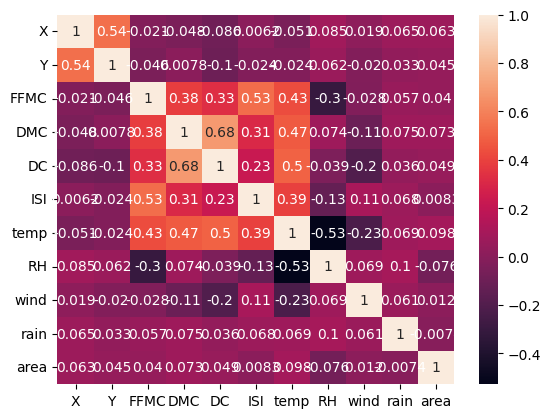

In [ ]:
# Se visualizan la correlacion entre las caracteristicas, no hay una correlacion muy alta entre las variables para descartar alguna
corr_df = df.corr(method='pearson')
sns.heatmap(corr_df, annot=True)
plt.show()

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

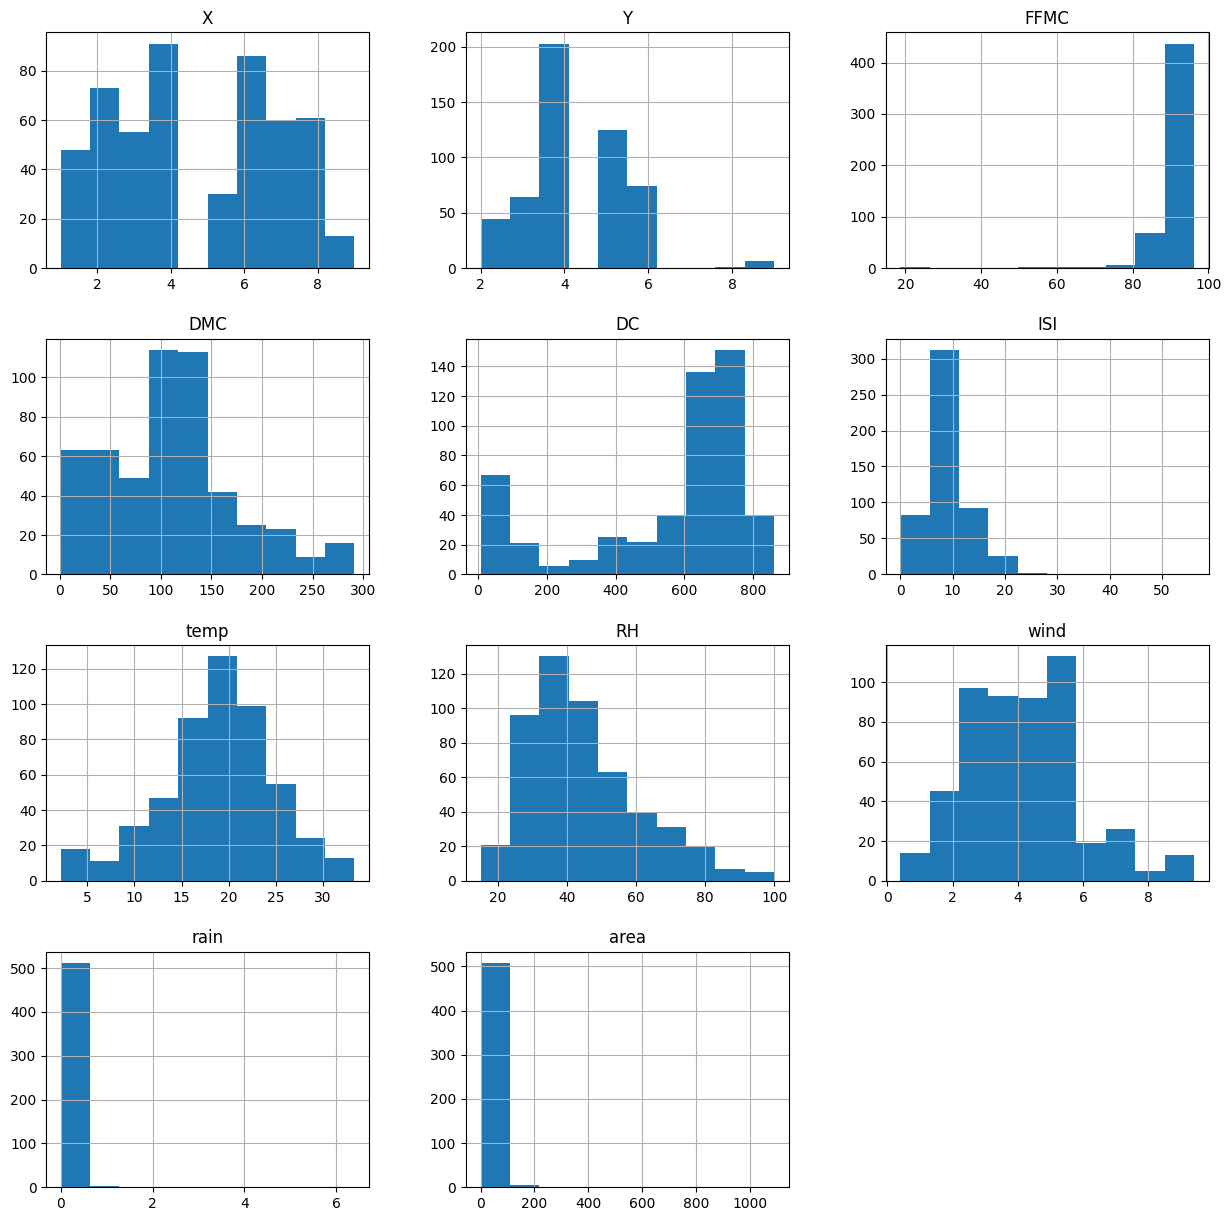

In [ ]:
df.hist(figsize=(15,15))

<function matplotlib.pyplot.show(close=None, block=None)>

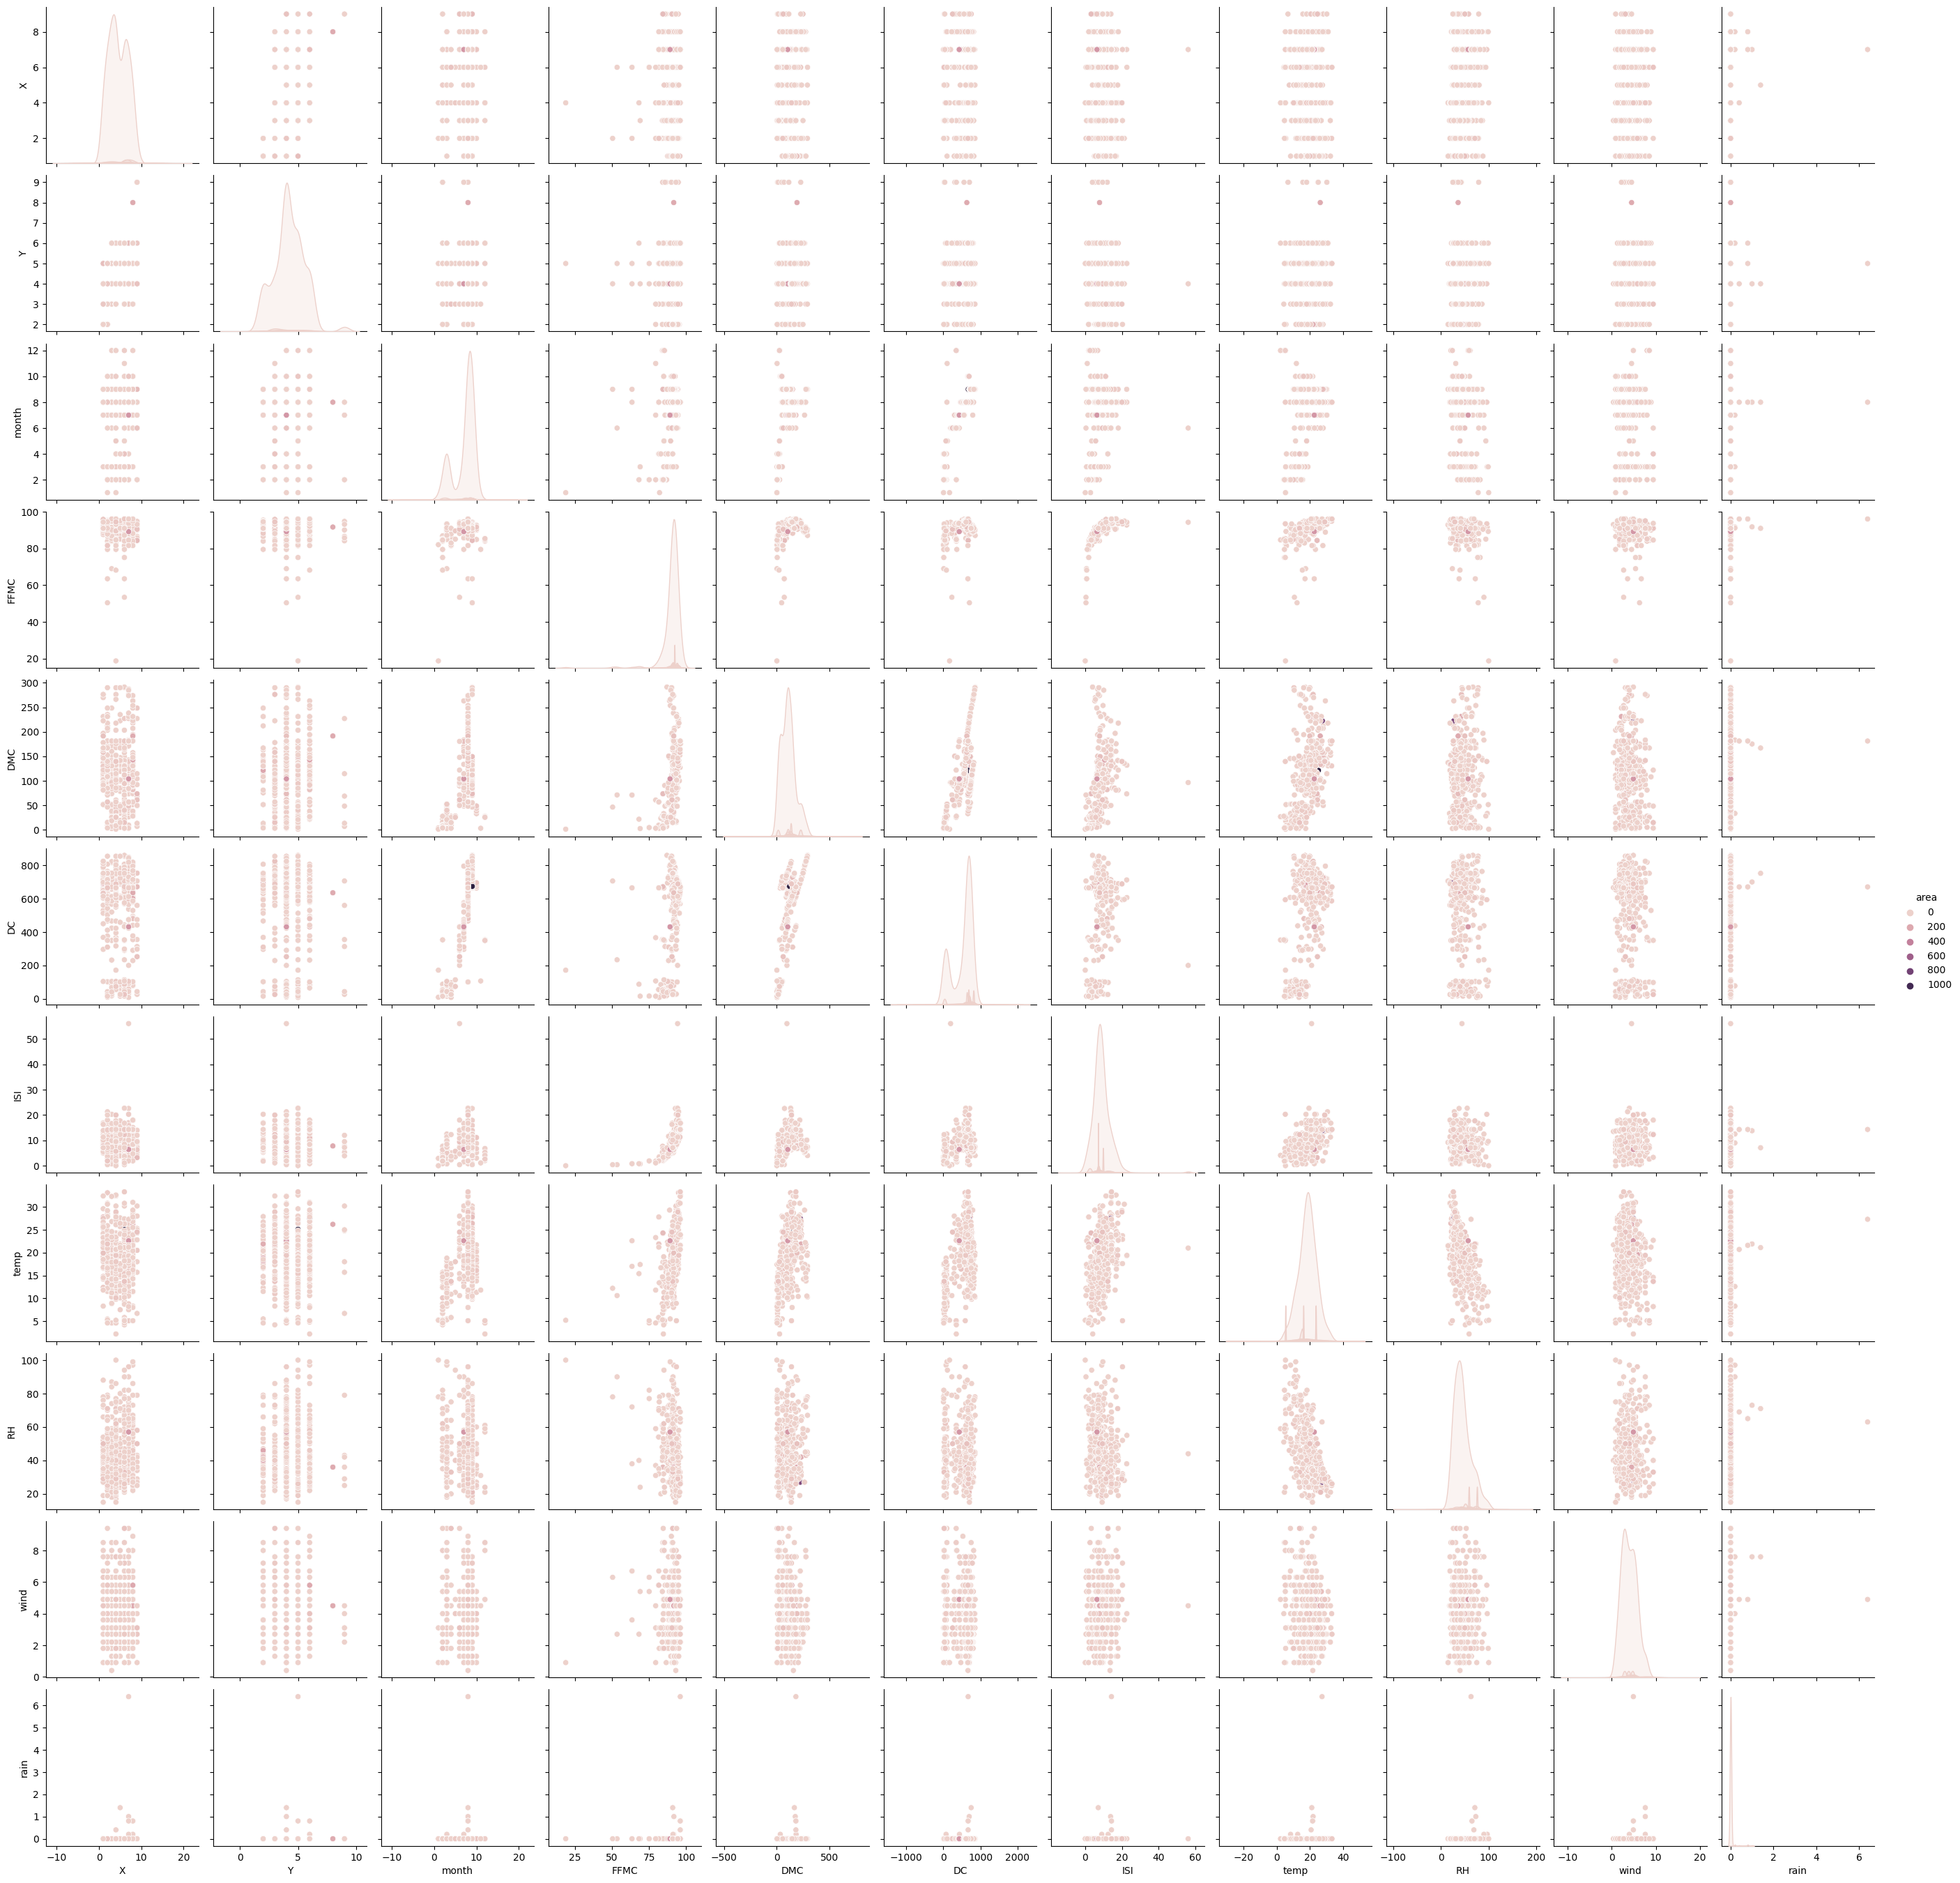

In [ ]:
sns.pairplot(df, hue='area')
plt.show

##Normalizando los datos



In [ ]:
#Normalizacion de los datos para trabajarlos en un mismo rango numerico
data_df = df.drop(['day'], axis= 1)
d = preprocessing.normalize(data_df)
scaled_df = pd.DataFrame(d, columns=data_df.columns)

print(scaled_df)

            X         Y     month      FFMC       DMC        DC       ISI  \
0    0.049707  0.035505  0.021303  0.612110  0.186047  0.669628  0.036215   
1    0.010335  0.005906  0.014764  0.133760  0.052264  0.987845  0.009892   
2    0.010067  0.005753  0.014382  0.130301  0.062849  0.987897  0.009636   
3    0.050387  0.037790  0.018895  0.577564  0.209737  0.488127  0.056686   
4    0.045301  0.033976  0.016988  0.505672  0.290492  0.578720  0.054361   
..        ...       ...       ...       ...       ...       ...       ...   
512  0.005931  0.004448  0.011862  0.120994  0.084073  0.986930  0.002817   
513  0.002944  0.005888  0.011776  0.120119  0.083465  0.979792  0.002797   
514  0.010337  0.005907  0.011814  0.120503  0.083732  0.982926  0.002806   
515  0.001560  0.006241  0.012483  0.147297  0.227812  0.959150  0.017632   
516  0.043526  0.021763  0.079799  0.576726  0.021763  0.774046  0.007980   

         temp        RH      wind     rain      area  
0    0.058229  0.362

In [ ]:
# normalizando segundo grupo

d_2 = preprocessing.normalize(Data_g2)
scaled_2 = pd.DataFrame(d_2, columns=Data_g2.columns)

print(scaled_2)

         temp        RH      wind      rain
0    0.157427  0.979118  0.128629  0.000000
1    0.478715  0.877644  0.023936  0.000000
2    0.404333  0.913903  0.036002  0.000000
3    0.085183  0.995517  0.041052  0.002053
4    0.114377  0.993273  0.018060  0.000000
..        ...       ...       ...       ...
512  0.654502  0.753383  0.063567  0.000000
513  0.293854  0.952677  0.077824  0.000000
514  0.288647  0.953080  0.091223  0.000000
515  0.518750  0.851075  0.081055  0.000000
516  0.352515  0.926100  0.134434  0.000000

[517 rows x 4 columns]


##Entrenamiento

In [ ]:
X = scaled_df.drop(['area'], axis=1)
y = scaled_df.drop(['temp','RH','wind','rain','X','Y','FFMC','DMC','DC','ISI'],axis=1)
target = scaled_df['area'].values#y_train

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.20)

In [ ]:
model = models.Sequential()
model.add(Dense(64,activation='relu',input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

In [ ]:
model.compile(loss='MeanSquaredLogarithmicError',
              optimizer=Adagrad(),
              #metrics='accuracy'
)

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=2000,
                    batch_size=50,
                    validation_data=(X_test, y_test)
                    )

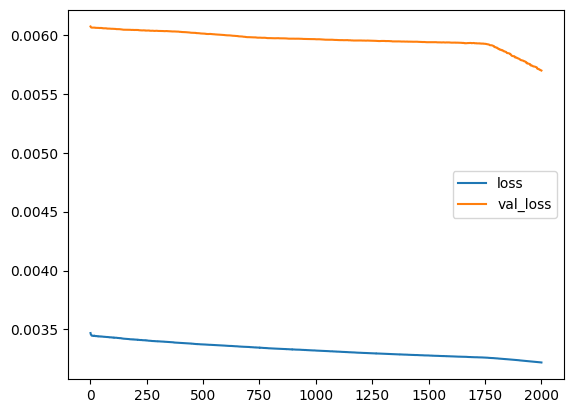

In [ ]:
loss_values = history.history['loss']
value_loss = history.history['val_loss']
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, label = 'loss')
plt.plot(epoch,value_loss, label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0057


0.0056991796009242535

4/4 [==============================] - 0s 2ms/step
(104, 1)


(0.0, 0.1)

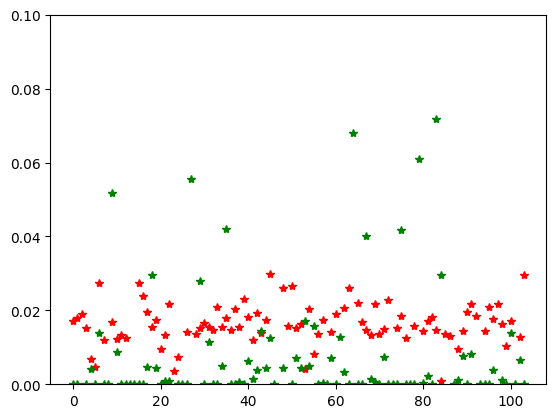

In [ ]:
output2 = model.predict(X_test)
print(output2.shape)
plt.figure()
plt.plot(output2, '*r',y_test,'*g')
plt.ylim(0,0.1)

In [ ]:
salida_entreno = model.predict(X_train)
print(salida_entreno)

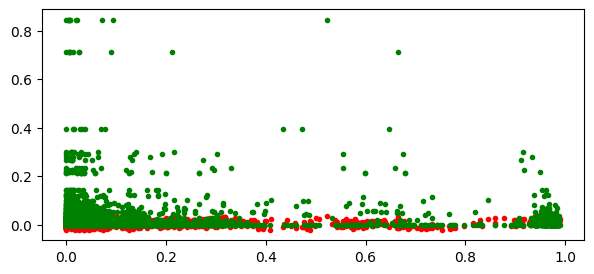

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(X_train,salida_entreno, '.r', X_train,y_train,'.g')

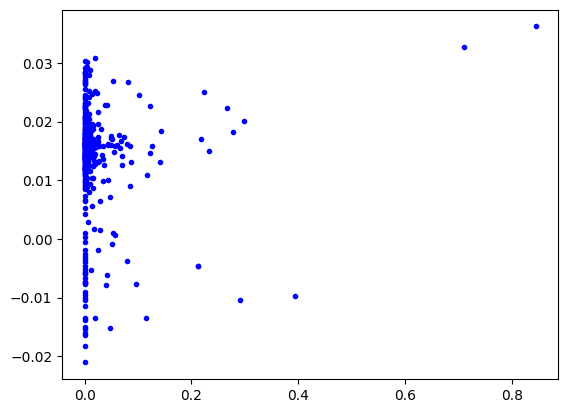

In [ ]:
plt.figure()
plt.plot(y_train,salida_entreno, '.b')

Coeficiente : 0.007206510725193971
(413, 1) (413, 1)


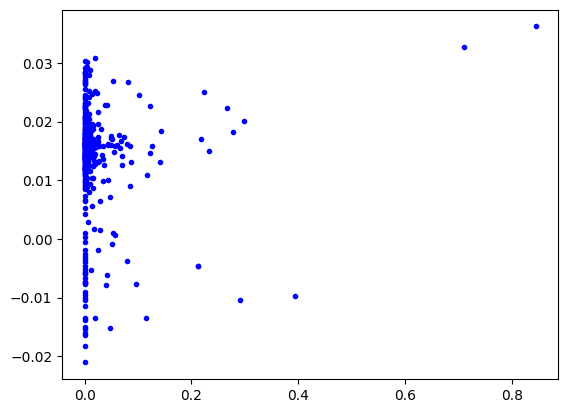

In [ ]:

Salida = salida_entreno
target_ = y_train.reshape(413,1)
regr = linear_model.LinearRegression()
regr.fit(target_,Salida)

coef = regr.coef_
print("Coeficiente :",coef[0][0])
print(Salida.shape , target_.shape)
plt.figure()
plt.plot(y_train,salida_entreno, '.b')

##Entrenamiento 2

In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(scaled_2,target,test_size=0.20,random_state=42)
# la semilla ayuda a que siempre sean los mismos en el momentos que se este realizando

In [ ]:
model2 = models.Sequential()
model2.add(Dense(32,activation='sigmoid',input_shape=(4,)))
model2.add(Dense(64, activation='linear'))
model2.add(Dense(16, activation='linear'))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='mse',
              optimizer=SGD(),
              #metrics='accuracy'
)

In [ ]:
history2 = model2.fit(X_train2,y_train2,
                    epochs=2000,
                    batch_size=32,
                    validation_data=(X_test2, y_test2)
                    )



Epoch 1/2000
13/13 [==============================] - 0s 16ms/step - loss: 0.1548 - val_loss: 0.0107
Epoch 2/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0111
Epoch 3/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0107
Epoch 4/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0107
Epoch 5/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0107
Epoch 6/2000
13/13 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0107
Epoch 7/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0112
Epoch 8/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0107
Epoch 9/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0108
Epoch 10/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.010

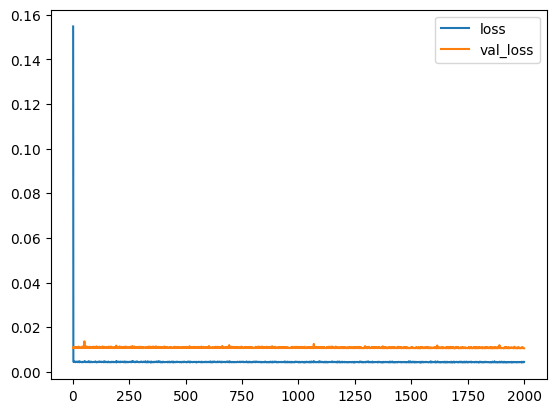

In [ ]:
loss_values2 = history2.history['loss']
value_loss2 = history2.history['val_loss']
epoch = range(1,len(loss_values2)+1)
plt.plot(epoch,loss_values2, label = 'loss')
plt.plot(epoch,value_loss2, label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
output = model2.predict(X_test2)
print(output.shape)


4/4 [==============================] - 0s 2ms/step
(104, 1)


(0.0, 0.1)

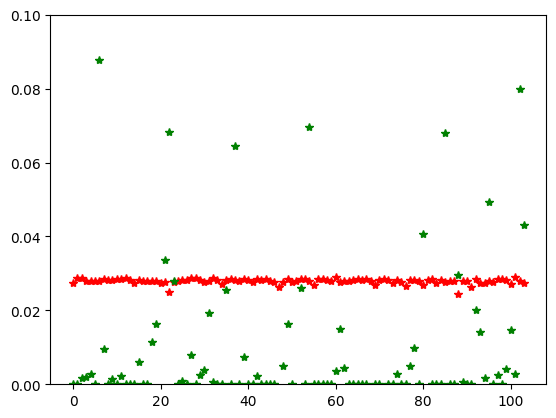

In [ ]:
plt.figure()
plt.plot(output, '*r',y_test2,'*g')
plt.ylim(0,0.1)

In [ ]:
salida_entreno2 = model2.predict(X_train2)
print(salida_entreno2)

13/13 [==============================] - 0s 2ms/step
[[0.02806917]
 [0.02847419]
 [0.02818822]
 [0.02835697]
 [0.02802685]
 [0.02838965]
 [0.0282914 ]
 [0.02759508]
 [0.02607607]
 [0.02842661]
 [0.02814612]
 [0.02789472]
 [0.02798565]
 [0.02852319]
 [0.0283    ]
 [0.0274352 ]
 [0.02798192]
 [0.0280307 ]
 [0.02822271]
 [0.02755977]
 [0.02833664]
 [0.02740813]
 [0.0287696 ]
 [0.02849909]
 [0.02787225]
 [0.02454776]
 [0.0282418 ]
 [0.02836544]
 [0.02831786]
 [0.02772953]
 [0.0276604 ]
 [0.02775202]
 [0.02738475]
 [0.02793019]
 [0.02816372]
 [0.02655067]
 [0.02781181]
 [0.02782871]
 [0.02717999]
 [0.02843513]
 [0.02827401]
 [0.02856745]
 [0.0285355 ]
 [0.02805887]
 [0.02802129]
 [0.02777887]
 [0.0278491 ]
 [0.0276329 ]
 [0.02816465]
 [0.02743429]
 [0.02811133]
 [0.02819135]
 [0.02866076]
 [0.0278546 ]
 [0.02780777]
 [0.02805885]
 [0.02766616]
 [0.0284592 ]
 [0.02775411]
 [0.02697717]
 [0.02789631]
 [0.02823579]
 [0.02743046]
 [0.02810902]
 [0.02805513]
 [0.02756358]
 [0.02820926]
 [0.02814

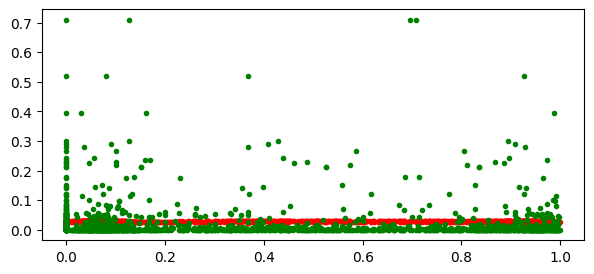

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(X_train2,salida_entreno2, '.r', X_train2,y_train2,'.g')

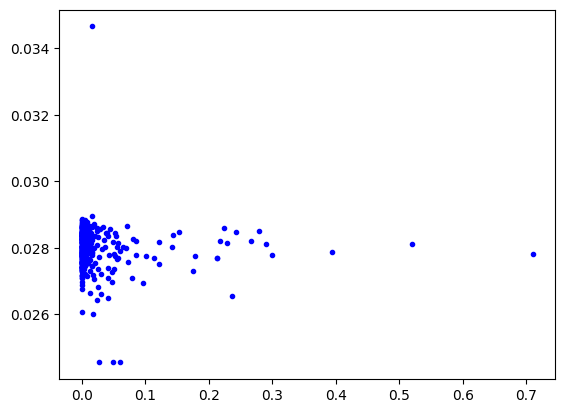

In [ ]:
plt.figure()
plt.plot(y_train2,salida_entreno2, '.b')

Coeficiente : -0.0005245263125335958
(413, 1) (413, 1)


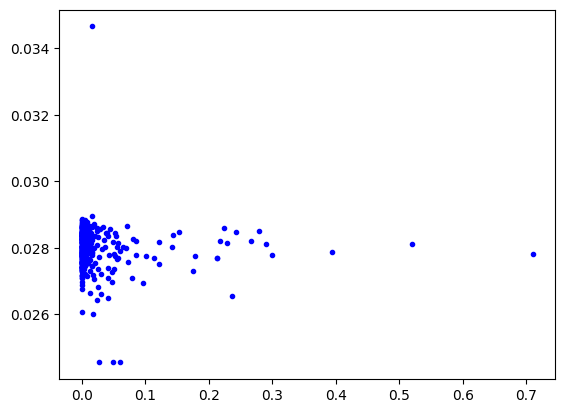

In [ ]:
from sklearn import linear_model
Salida2 = salida_entreno2
target_2 = y_train2.reshape(413,1)
regr2 = linear_model.LinearRegression()
regr2.fit(target_2,Salida2)

coef2 = regr2.coef_
print("Coeficiente :",coef2[0][0])
print(Salida2.shape , target_2.shape)
plt.figure()
plt.plot(y_train2,salida_entreno2, '.b')

##Entrenamiento 3

In [ ]:
model3 = models.Sequential()

model3.add(Dense(64,activation='linear',input_shape=(11,)))
model3.add(Dense(128, activation='sigmoid'))
model3.add(Dense(236, activation='sigmoid'))
model3.add(Dense(360, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                768       
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 236)               30444     
                                                                 
 dense_11 (Dense)            (None, 360)               85320     
                                                                 
 dense_12 (Dense)            (None, 32)                11552     
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)               

In [ ]:
model3.compile(loss='mse',
              optimizer=SGD(),

)

In [ ]:
history3 = model3.fit(X_train,y_train,
                    epochs=2000,
                    batch_size=50,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/2000
9/9 [==============================] - 1s 28ms/step - loss: 0.0294 - val_loss: 0.0081
Epoch 2/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0103 - val_loss: 0.0077
Epoch 3/2000
9/9 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 4/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 5/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0076
Epoch 6/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0064 - val_loss: 0.0077
Epoch 7/2000
9/9 [==============================] - 0s 9ms/step - loss: 0.0057 - val_loss: 0.0077
Epoch 8/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.0077
Epoch 9/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 0.0077
Epoch 10/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.0077
Epoch 11/2000
9/9 

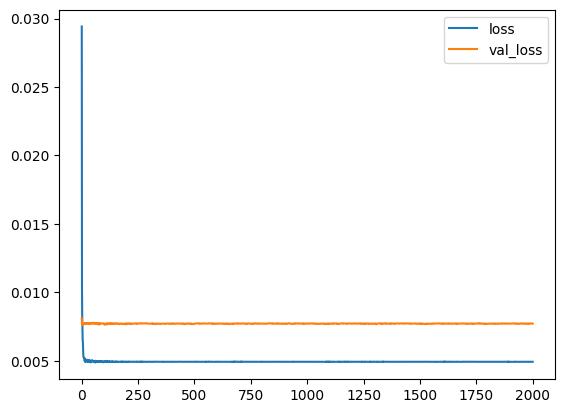

In [ ]:
loss_values3 = history3.history['loss']
value_loss3 = history3.history['val_loss']
epoch = range(1,len(loss_values3)+1)
plt.plot(epoch,loss_values3, label = 'loss')
plt.plot(epoch,value_loss3, label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
model3.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0077


0.007712968159466982

4/4 [==============================] - 0s 2ms/step
(104, 1)


(0.0, 0.1)

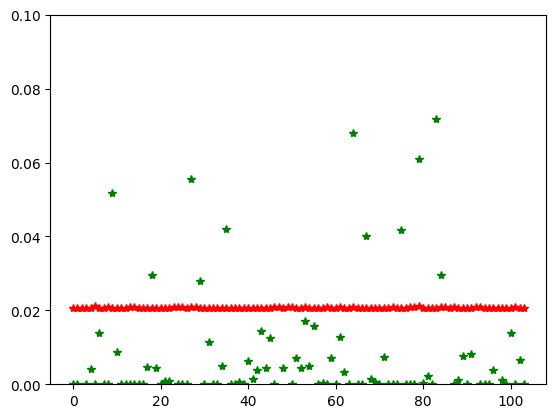

In [ ]:
output3 = model3.predict(X_test)
print(output3.shape)
plt.figure()
plt.plot(output3, '*r',y_test,'*g')
plt.ylim(0,0.1)

In [ ]:
salida_entreno3 = model3.predict(X_train)
print(salida_entreno3)

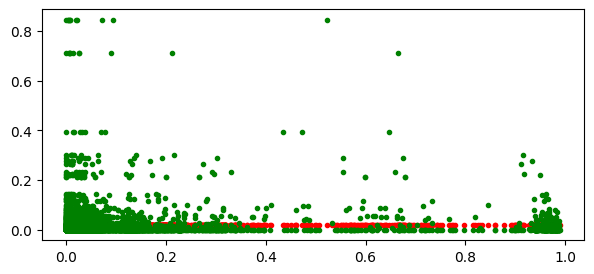

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(X_train,salida_entreno3, '.r', X_train,y_train,'.g')

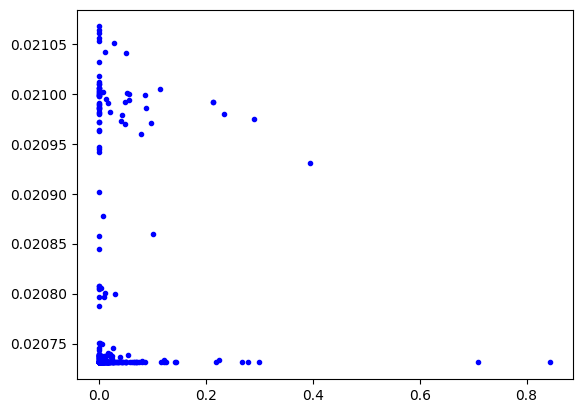

In [ ]:
plt.figure()
plt.plot(y_train,salida_entreno3, '.b')

Coeficiente : 9.844036902951518e-05
(413, 1) (413, 1)


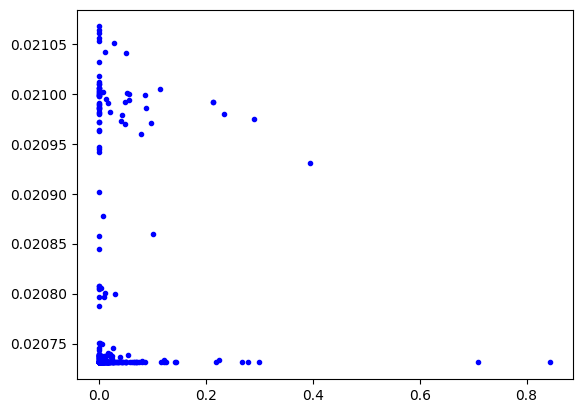

In [ ]:

Salida3 = salida_entreno3
target_3 = y_train.reshape(413,1)
regr3 = linear_model.LinearRegression()
regr3.fit(target_3,Salida3)

coef3 = regr3.coef_
print("Coeficiente :",coef3[0][0])
print(Salida3.shape , target_3.shape)
plt.figure()
plt.plot(y_train,salida_entreno3, '.b')

##Entrenamiento 4

In [ ]:
model4 = models.Sequential()
model4.add(Dense(32,activation='relu',input_shape=(11,)))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(1, activation='linear'))

In [ ]:
model4.compile(loss='mse',
              optimizer=SGD()

)

In [ ]:
history4 = model4.fit(X_train,y_train,
                    epochs=2000,
                    batch_size=50,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/2000
9/9 [==============================] - 0s 21ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 2/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0065 - val_loss: 0.0086
Epoch 3/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.0081
Epoch 4/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.0079
Epoch 5/2000
9/9 [==============================] - 0s 8ms/step - loss: 0.0055 - val_loss: 0.0079
Epoch 6/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.0079
Epoch 7/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.0078
Epoch 8/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0078
Epoch 9/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: 0.0078
Epoch 10/2000
9/9 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0078
Epoch 11/2000
9/9 

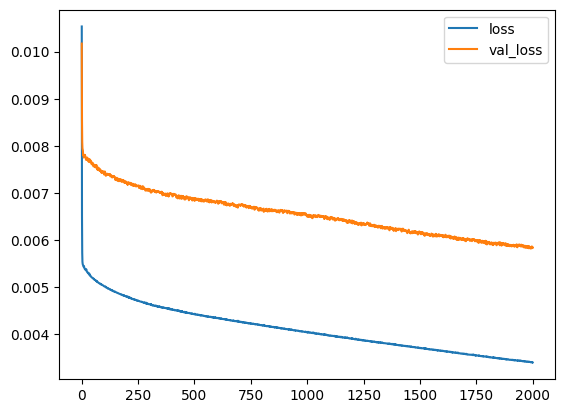

In [ ]:
loss_values4 = history4.history['loss']
value_loss4 = history4.history['val_loss']
epoch = range(1,len(loss_values4)+1)
plt.plot(epoch,loss_values4, label = 'loss')
plt.plot(epoch,value_loss4, label = 'val_loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


(0.0, 0.1)

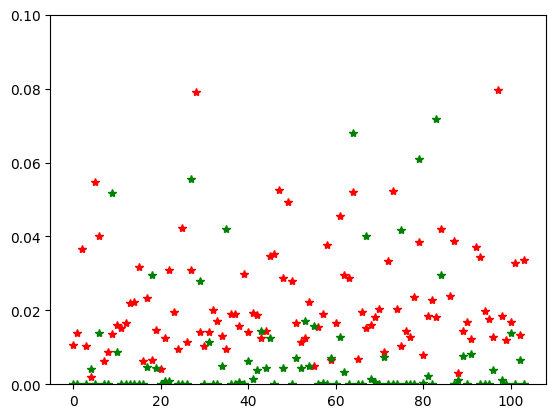

In [ ]:
output4 = model4.predict(X_test)

plt.figure()
x =plt.plot(output4, '*r',y_test,'*g')
plt.ylim(0,0.1)

In [ ]:
salida_entreno4 = model4.predict(X_train)
print(salida_entreno4)

13/13 [==============================] - 0s 2ms/step
[[ 6.96827471e-03]
 [ 2.32253969e-03]
 [ 4.05297130e-02]
 [ 1.07174367e-02]
 [ 2.05493122e-02]
 [ 2.27688998e-02]
 [ 8.82019103e-03]
 [ 1.47192180e-02]
 [ 1.46832019e-02]
 [ 2.77815759e-03]
 [ 2.87780315e-02]
 [ 8.71880352e-03]
 [ 5.35015762e-03]
 [ 1.70396119e-02]
 [ 2.07012445e-02]
 [ 1.69910640e-02]
 [ 4.48314250e-02]
 [ 1.05753541e-02]
 [ 3.91887128e-03]
 [ 9.41719115e-03]
 [ 1.59759670e-02]
 [ 1.73292905e-02]
 [ 8.23132470e-02]
 [ 1.94984525e-02]
 [ 3.41143310e-02]
 [ 1.45624578e-03]
 [ 9.98438895e-03]
 [ 1.39308721e-02]
 [ 2.25552469e-02]
 [ 1.29705518e-02]
 [ 3.86278480e-02]
 [ 2.27391720e-05]
 [ 4.65380996e-02]
 [ 1.92424804e-02]
 [ 1.69826299e-02]
 [ 1.27042681e-02]
 [ 1.96839869e-02]
 [ 5.74688613e-03]
 [ 3.57373506e-02]
 [ 1.97128803e-02]
 [ 5.16463816e-03]
 [ 5.00583351e-02]
 [ 1.43032968e-02]
 [ 2.51021981e-02]
 [ 1.83081627e-02]
 [ 1.51019543e-02]
 [ 5.09289354e-02]
 [ 1.09472722e-02]
 [ 2.17419118e-02]
 [ 1.23084635e-0

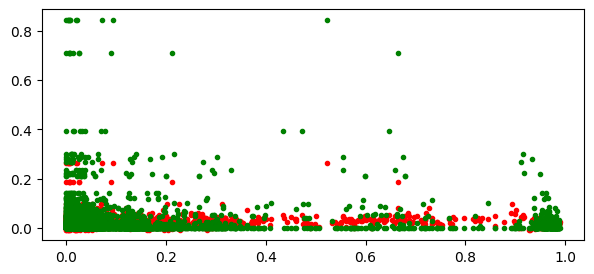

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(X_train,salida_entreno4, '.r', X_train,y_train,'.g')

In [ ]:
weights = model4.layers[0].get_weights()
weights[1]

array([ 0.02512355, -0.02477992, -0.13983898,  0.        ,  0.06701332,
        0.07657085, -0.01528397,  0.07064721,  0.        ,  0.        ,
       -0.01977621,  0.        , -0.02290496, -0.010016  ,  0.00374953,
       -0.01981291, -0.01951698,  0.03402897, -0.05087824,  0.04301662,
        0.00367948, -0.05492638,  0.        , -0.01282956,  0.03902571,
       -0.00511389,  0.        ,  0.        , -0.0504418 , -0.04195469,
        0.        ,  0.04834969], dtype=float32)

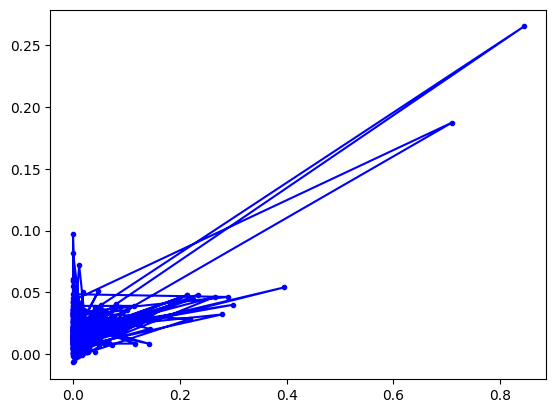

In [ ]:
plt.figure()
plt.plot(y_train,salida_entreno4, '.-b')

Coeficiente : 0.19302437711633164
(413, 1) (413, 1)


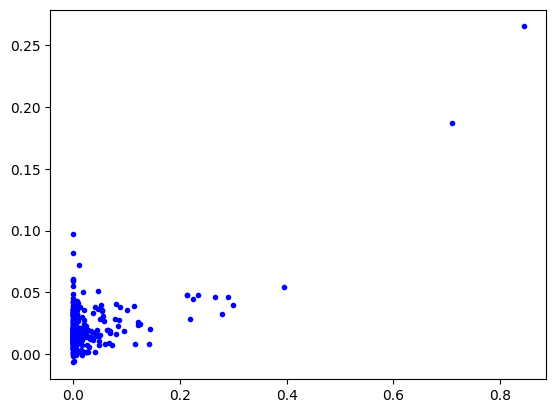

In [ ]:
from sklearn import linear_model
Salida4 = salida_entreno4
target_4 = y_train.reshape(413,1)
regr4 = linear_model.LinearRegression()
regr4.fit(target_4,Salida4)

coef4 = regr4.coef_
print("Coeficiente :",coef4[0][0])
print(Salida4.shape , target_4.shape)
plt.figure()
plt.plot(y_train,salida_entreno4, '.b')

##Comparacion entrenamientos


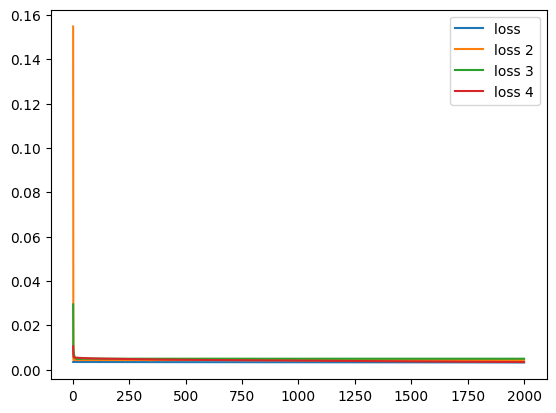

In [ ]:
epoch = range(1,len(loss_values4)+1)
plt.plot(epoch,loss_values, label = 'loss ')
plt.plot(epoch,loss_values2, label = 'loss 2')
plt.plot(epoch,loss_values3, label = 'loss 3')
plt.plot(epoch,loss_values4, label = 'loss 4')
plt.legend()
plt.show()

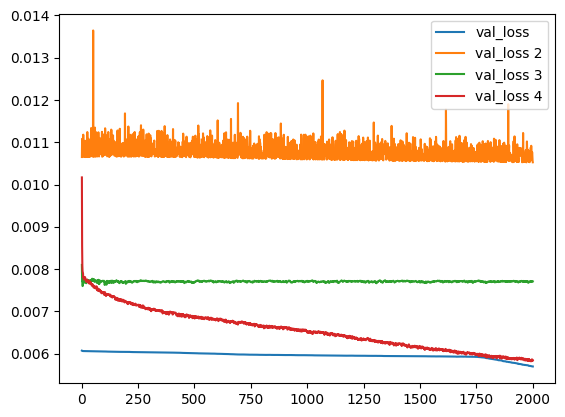

In [ ]:
epoch = range(1,len(loss_values4)+1)
plt.plot(epoch,value_loss, label = 'val_loss')
plt.plot(epoch,value_loss2, label = 'val_loss 2')
plt.plot(epoch,value_loss3, label = 'val_loss 3')
plt.plot(epoch,value_loss4, label = 'val_loss 4')
plt.legend()
plt.show()

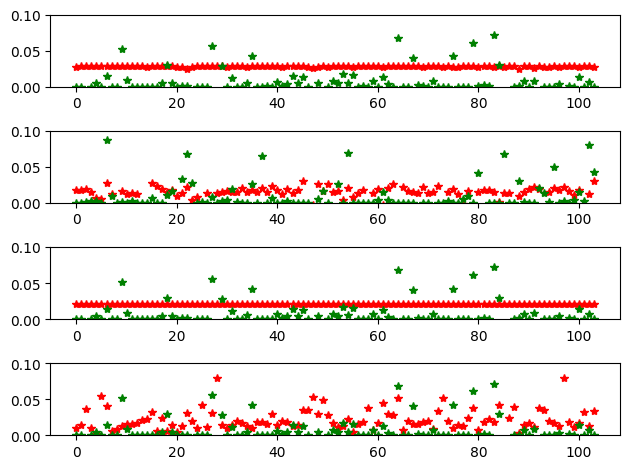

In [ ]:
plt.figure()
plt.subplot(411)
plt.plot(output, '*r',y_test,'*g')
plt.ylim(0,0.1)
plt.subplot(412)
plt.plot(output2, '*r',y_test2,'*g')
plt.ylim(0,0.1)
plt.subplot(413)
plt.plot(output3, '*r',y_test,'*g')
plt.ylim(0,0.1)
plt.subplot(414)
plt.plot(output4, '*r',y_test,'*g')
plt.ylim(0,0.1)
plt.tight_layout()

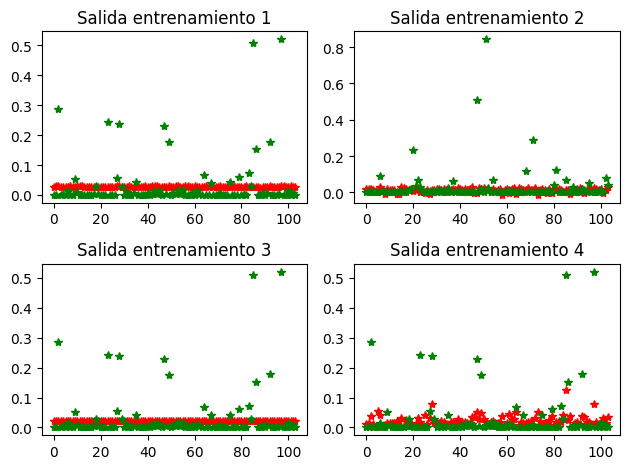

In [ ]:
figplots, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
ax1.plot(output, '*r',y_test,'*g')
ax1.set_title('Salida entrenamiento 1')

ax2.plot(output2, '*r',y_test2,'*g')
ax2.set_title('Salida entrenamiento 2')

ax3.plot(output3, '*r',y_test,'*g')
ax3.set_title('Salida entrenamiento 3')
ax4.plot(output4, '*r',y_test,'*g')
ax4.set_title('Salida entrenamiento 4')
figplots.tight_layout()


In [ ]:
print("Coeficiente: ", coef[0][0],
      "Coeficiente 2:",coef2[0][0],
      "Coeficiente 3:", coef3[0][0],
      "Coeficiente 4:", coef4[0][0])

Coeficiente:  0.007206510725193971 Coeficiente 2: -0.0005245263125335958 Coeficiente 3: 9.844036902951518e-05 Coeficiente 4: 0.19302437711633164


##Pesos de las neuronas

In [ ]:
weights = model.layers[0].get_weights()
weights[0]

array([[-0.18568325,  0.10685155,  0.26742843, -0.2272797 ,  0.24471751,
        -0.10483595, -0.03141524, -0.0846417 ,  0.20437638,  0.24486704,
         0.12686305, -0.13540131,  0.22382256,  0.01730982,  0.2133351 ,
         0.26500586, -0.22404012,  0.0575138 , -0.2560864 , -0.08133749,
         0.19917732,  0.13709578, -0.242596  , -0.04298446,  0.26233968,
        -0.16363361,  0.08577818, -0.21322624, -0.09988066,  0.25379816,
        -0.2792163 , -0.2551438 , -0.00790832, -0.06215626, -0.10871083,
         0.19137013,  0.18204938, -0.25034857,  0.10869235, -0.20034528,
         0.22232668, -0.16940284, -0.04942993, -0.15533052,  0.12022534,
         0.11237403,  0.24228884, -0.06306402,  0.13232206,  0.17516649,
         0.16249156,  0.12646222, -0.01778298, -0.15432334, -0.04991131,
         0.14268267,  0.18251434, -0.19527869,  0.2525021 ,  0.1524908 ,
         0.16910289, -0.2462337 ,  0.15554707,  0.09868969],
       [-0.18027875, -0.23949772,  0.22938503, -0.17377532,  0.

In [ ]:
weights2 = model2.layers[0].get_weights()
weights2[0]

array([[ 0.11555409, -0.37453204,  0.13622895, -0.13283044, -0.1705551 ,
        -0.15242764, -0.16833556, -0.12572633, -0.3240818 , -0.32412872,
        -0.27818438, -0.35295933, -0.35599697,  0.29567587,  0.12275358,
        -0.19640219, -0.35616776, -0.26964885, -0.11658581, -0.28826618,
         0.28659585,  0.3780844 ,  0.2055993 , -0.2450214 , -0.22865525,
        -0.33462742,  0.12418781,  0.08856185,  0.00907916,  0.10714507,
         0.37246844,  0.3664148 ],
       [-0.09762076, -0.31764466, -0.22464621, -0.22953857, -0.1902474 ,
        -0.3334517 , -0.16168314,  0.14509769,  0.22597045,  0.06748175,
        -0.32588464,  0.09137267, -0.00653251,  0.2933622 ,  0.37142232,
        -0.3349858 , -0.11537942,  0.08994937,  0.31660855,  0.18903327,
        -0.09250947, -0.18538018,  0.15325953,  0.00155905, -0.18336955,
         0.24176429, -0.05616756,  0.10314634,  0.00205198,  0.04006068,
         0.06623853, -0.26622552],
       [ 0.14007543, -0.18142085,  0.28300455, -0.0174

In [ ]:
weights3 = model3.layers[0].get_weights()
weights3[0]

array([[ 7.00125098e-02,  5.42651117e-02,  1.47487879e-01,
        -1.71093985e-01, -8.34143311e-02,  2.08764017e-01,
        -9.97348651e-02,  4.43371646e-02, -7.68569633e-02,
         1.76642671e-01,  1.52022719e-01,  7.27896467e-02,
         2.55372435e-01, -1.08683579e-01, -6.58639744e-02,
         1.29854158e-01,  1.74482130e-02,  9.05284211e-02,
         1.06403045e-02,  2.47723699e-01,  2.80456036e-01,
         3.70537005e-02,  1.92034066e-01,  6.96912920e-03,
         2.73173541e-01,  1.34746492e-01,  1.01663701e-01,
         2.28287548e-01, -2.74042666e-01,  1.29869297e-01,
        -4.73913103e-02,  1.55151784e-01,  6.53510839e-02,
         1.00370780e-01,  1.96942419e-01, -8.14467818e-02,
         1.69961661e-01, -2.78445780e-01, -1.44198358e-01,
         6.35795994e-03,  1.19404169e-03,  1.00444794e-01,
        -4.34976220e-02,  1.02888905e-01, -4.98199873e-02,
         2.67995715e-01,  1.08108474e-02,  1.84634998e-01,
         1.97102487e-01,  1.01534873e-01,  1.09573700e-0

In [ ]:
weights4 = model4.layers[0].get_weights()
weights[0]

array([[-0.18568325,  0.10685155,  0.26742843, -0.2272797 ,  0.24471751,
        -0.10483595, -0.03141524, -0.0846417 ,  0.20437638,  0.24486704,
         0.12686305, -0.13540131,  0.22382256,  0.01730982,  0.2133351 ,
         0.26500586, -0.22404012,  0.0575138 , -0.2560864 , -0.08133749,
         0.19917732,  0.13709578, -0.242596  , -0.04298446,  0.26233968,
        -0.16363361,  0.08577818, -0.21322624, -0.09988066,  0.25379816,
        -0.2792163 , -0.2551438 , -0.00790832, -0.06215626, -0.10871083,
         0.19137013,  0.18204938, -0.25034857,  0.10869235, -0.20034528,
         0.22232668, -0.16940284, -0.04942993, -0.15533052,  0.12022534,
         0.11237403,  0.24228884, -0.06306402,  0.13232206,  0.17516649,
         0.16249156,  0.12646222, -0.01778298, -0.15432334, -0.04991131,
         0.14268267,  0.18251434, -0.19527869,  0.2525021 ,  0.1524908 ,
         0.16910289, -0.2462337 ,  0.15554707,  0.09868969],
       [-0.18027875, -0.23949772,  0.22938503, -0.17377532,  0.

## Peso de los Bias

In [ ]:
weights = model.layers[0].get_weights()
weights[1]

array([-2.21360452e-03,  3.77537543e-03,  2.19060909e-02,  0.00000000e+00,
        0.00000000e+00,  4.68662271e-04, -3.48002277e-03, -2.82700569e-03,
       -5.07055840e-04, -6.76303403e-03, -8.63006244e-06,  0.00000000e+00,
        0.00000000e+00, -9.72153357e-05,  0.00000000e+00,  6.55918662e-03,
       -7.54481507e-03,  0.00000000e+00,  1.81079010e-08, -4.51302575e-03,
        0.00000000e+00,  4.49355488e-04, -6.42642658e-03,  0.00000000e+00,
       -3.41258012e-04, -1.38444129e-05,  4.26248694e-03,  0.00000000e+00,
        2.15490581e-03,  0.00000000e+00,  3.38166067e-03, -1.06566267e-05,
        6.93800300e-03, -6.27613417e-06,  0.00000000e+00, -3.83239496e-03,
       -1.70394476e-03,  0.00000000e+00,  1.28560753e-08,  4.39699681e-04,
        4.00986231e-04,  1.01005426e-04, -1.30666059e-03,  4.03013220e-03,
       -6.60938025e-03, -7.99090508e-03, -7.14792171e-03, -3.12273265e-08,
       -6.31848024e-03, -2.24197152e-06,  0.00000000e+00,  4.03965125e-03,
        5.28356642e-04,  

In [ ]:
weights2 = model2.layers[0].get_weights()
weights2[1]

array([-2.2830192e-03, -1.8247468e-03, -3.1759823e-03, -4.0874267e-03,
       -2.4848080e-03, -1.5223606e-03,  5.4837530e-04, -2.6009872e-03,
       -2.9685446e-03,  3.5572675e-04, -2.3266829e-03, -1.0375042e-03,
       -1.6936072e-03,  5.5793913e-05,  9.4254431e-04,  1.4777470e-04,
       -9.0601231e-04, -1.8973277e-04, -1.9382280e-03, -8.7042696e-05,
       -1.0446204e-04, -7.0080213e-04, -4.5617246e-03, -2.0425166e-03,
       -3.0157666e-04, -3.0532882e-03, -2.9023397e-03, -1.3161227e-03,
       -1.6471213e-03, -2.6024301e-03, -1.9513740e-04, -5.7644653e-04],
      dtype=float32)

In [ ]:
weights3 = model3.layers[0].get_weights()
weights3[1]

array([ 1.23632972e-05, -5.03362680e-05, -9.79447359e-05, -4.54005276e-05,
       -3.85246713e-05,  6.45678010e-05,  3.46195993e-05, -7.22195327e-05,
       -9.59342797e-05,  2.47790922e-05,  7.75281223e-05,  4.99021080e-05,
       -6.45798500e-05, -3.58437464e-05, -4.59746303e-07,  3.25907822e-05,
       -2.08455203e-05, -2.03210748e-05,  4.50906045e-05, -2.30272162e-05,
       -9.60029865e-06, -3.49032166e-06,  6.57026103e-05, -2.66024508e-05,
        1.03043451e-04,  5.57409185e-05,  4.57928145e-05,  2.33973097e-07,
       -1.47218789e-05, -3.28931928e-05, -2.11895931e-05,  3.03592078e-05,
        4.95489330e-05, -1.03456936e-04,  3.65234373e-05,  3.53951873e-05,
        2.65676354e-05,  8.14160085e-05, -8.74800116e-06,  8.30819918e-05,
        1.52348686e-04, -7.77535970e-05, -1.32940686e-05, -1.35903265e-05,
       -5.91021635e-05, -7.03581245e-05, -7.18017145e-06,  4.35899528e-05,
        3.01189575e-05,  3.69438567e-05,  1.36186500e-04,  9.15925011e-06,
        3.53275573e-05,  

In [ ]:
weights4 = model4.layers[0].get_weights()
weights4[1]

array([ 0.02512355, -0.02477992, -0.13983898,  0.        ,  0.06701332,
        0.07657085, -0.01528397,  0.07064721,  0.        ,  0.        ,
       -0.01977621,  0.        , -0.02290496, -0.010016  ,  0.00374953,
       -0.01981291, -0.01951698,  0.03402897, -0.05087824,  0.04301662,
        0.00367948, -0.05492638,  0.        , -0.01282956,  0.03902571,
       -0.00511389,  0.        ,  0.        , -0.0504418 , -0.04195469,
        0.        ,  0.04834969], dtype=float32)